In [0]:
import pandas as pd
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
(X_train, y_train), (X_test,y_test) = imdb.load_data()

17465344/17464789 [==============================] - 1s 0us/step


In [5]:
(X_train.shape, y_train.shape), (X_test.shape,y_test.shape)

(((25000,), (25000,)), ((25000,), (25000,)))

In [0]:
X = np.concatenate((X_train,y_train),axis=0)
y = np.concatenate((X_test, y_test),axis=0)

In [10]:
(X.shape,y.shape)

((50000,), (50000,))

In [13]:
#number of words
print(np.unique(np.hstack(X)))

[    0     1     2 ... 88584 88585 88586]


In [0]:
obj = pd.DataFrame(y)

In [23]:
#review length
result = [len(X) for x in X]
print("Mean:",np.mean(result))
print("StandardDeviation:",np.std(result))

Mean: 50000.0
StandardDeviation: 0.0


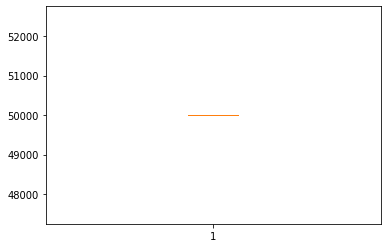

In [21]:
#Plot review length
plt.boxplot(result)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing import sequence 
from keras.layers.embeddings import Embedding

In [25]:
#Word Embedding
imdb.load_data(nb_words=5000)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
Embedding(5000,32,input_length=500)

/usr/local/lib/python3.6/dist-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [0]:
top_words= 5000
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=top_words)

In [28]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
#Instantiate the model
model = Sequential()
#Model architecture
model.add(Embedding(top_words,32,input_length=max_words))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Compilation
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()
#Model fit
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=128,verbose=2)
#Evaluation
scores = model.evaluate(X_test,y_test,verbose=0)
#Print the accuracy
print("Accuracy:%.2f%%" %(scores[1]*100))#Accuracy:87.93%

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 28s - loss: 0.5512 - accuracy: 0.6856 - val_loss: 0.3059 - val_accuracy: 0.8685
Epoch 2/2
 - 28s - loss: 0.2150 - accuracy: 0.9145 - val_loss: 0.2883 - val_accuracy: 0.8793


In [33]:
#1-D CNN
from keras.layers import MaxPool1D
top_words=5000
max_words=500
#Instantiate the model
model = Sequential()
#Model architecture
model.add(Embedding(top_words,32,input_length=max_words))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Compilation
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()
#Model fit
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128,verbose=2)
#Evaluation
scores = model.evaluate(X_test,y_test,verbose=0)
#Print the accuracy
print("Accuracy:%.2f%%" %(scores[1]*100))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 251       
Total params: 2,223,251
Trainable params: 2,223,251
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 17s - loss: 0.4995 - accuracy: 0.7078 - val_loss: 0.2884 - val_accuracy: 0.8792
Epoch 2/10
 - 17s - loss: 0.1860 - accuracy: 0.9302 - val_loss: 0.3211 - val_accuracy: 0.8683
Epoch 3/10
 - 17s - loss: 0.0562 - accuracy: 0.9834 - val_loss: 0.4691 - val_accuracy: 0.8603
Epoch 4/10
 - 17s - loss: 0.0152 - accuracy: 0.9961 - val_loss: 0.6434 - val_accuracy: 0.8528
Epoch 5/10
 - 17s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.8028 - val_accuracy: 0.8588
Epoch 6/10
 - 17s - loss: 5.8966e-04 - accuracy: 1.0000 - val_loss: 0.8484 - val_accuracy: 0.8620
Epoch 7/10
 - 17s - loss: 9.6909e-05 - accuracy: 1.0000 - val_loss: 0.8899 - val_accuracy: 0.8634
Epoch 8/10
 - 17s - loss: 4.8543e-05 - accuracy: 1.0000 - val_loss: 0.9339 - val_accuracy: 0.8644
Epoch 9/10
 - 17s - loss: 2.5180e-05 - accuracy: 1.0000 - val_loss: 0.9805 - val_accuracy: 0.8659
Epoch 10/10
 - 17s - loss: 1.3702e-05 - accuracy: 1.0000 - val_loss: 1.0213 - val_accura